In [0]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory




In [0]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving df.csv to df.csv
User uploaded file "df.csv" with length 365181098 bytes


In [0]:
import io

dfvIMS = pd.read_csv(io.BytesIO(uploaded['df.csv']))

# Dataset is now stored in a Pandas Dataframe

In [0]:
dfvIMS.shape

(177000, 157)

In [0]:
# here we print the name col to select later metrics per server. 
print('Column names are: ',list(dfvIMS.columns))

Column names are:  ['Unnamed: 0', 'bono-cpu.idle_perc', 'bono-cpu.stolen_perc', 'bono-cpu.system_perc', 'bono-cpu.wait_perc', 'bono-disk.inode_used_perc', 'bono-disk.space_used_perc', 'bono-io.read_kbytes_sec', 'bono-io.read_req_sec', 'bono-io.read_time_sec', 'bono-io.write_kbytes_sec', 'bono-io.write_req_sec', 'bono-io.write_time_sec', 'bono-load.avg_15_min', 'bono-load.avg_1_min', 'bono-load.avg_5_min', 'bono-mem.free_mb', 'bono-mem.total_mb', 'bono-mem.usable_mb', 'bono-mem.usable_perc', 'bono-net.in_bytes_sec', 'bono-net.in_errors_sec', 'bono-net.in_packets_dropped_sec', 'bono-net.in_packets_sec', 'bono-net.out_bytes_sec', 'bono-net.out_errors_sec', 'bono-net.out_packets_sec', 'ellis-cpu.idle_perc', 'ellis-cpu.stolen_perc', 'ellis-cpu.system_perc', 'ellis-cpu.wait_perc', 'ellis-disk.inode_used_perc', 'ellis-disk.space_used_perc', 'ellis-io.read_kbytes_sec', 'ellis-io.read_req_sec', 'ellis-io.read_time_sec', 'ellis-io.write_kbytes_sec', 'ellis-io.write_req_sec', 'ellis-io.write_time

In [0]:
dfvIMS.describe()

Unnamed: 0  ...  sprout-net.out_packets_sec
count  177000.000  ...                  177000.000
mean    88499.500  ...                       1.174
std     51095.643  ...                       0.798
min         0.000  ...                       1.000
25%     44249.750  ...                       1.015
50%     88499.500  ...                       1.017
75%    132749.250  ...                       1.021
max    176999.000  ...                      10.000

[8 rows x 157 columns]

In [0]:
dfvIMS.count()

Unnamed: 0                           177000
bono-cpu.idle_perc                   177000
bono-cpu.stolen_perc                 177000
bono-cpu.system_perc                 177000
bono-cpu.wait_perc                   177000
bono-disk.inode_used_perc            177000
bono-disk.space_used_perc            177000
bono-io.read_kbytes_sec              177000
bono-io.read_req_sec                 177000
bono-io.read_time_sec                177000
bono-io.write_kbytes_sec             177000
bono-io.write_req_sec                177000
bono-io.write_time_sec               177000
bono-load.avg_15_min                 177000
bono-load.avg_1_min                  177000
bono-load.avg_5_min                  177000
bono-mem.free_mb                     177000
bono-mem.total_mb                    177000
bono-mem.usable_mb                   177000
bono-mem.usable_perc                 177000
bono-net.in_bytes_sec                177000
bono-net.in_errors_sec               177000
bono-net.in_packets_dropped_sec 

In [0]:
dfvIMS = dfvIMS.astype(np.float)

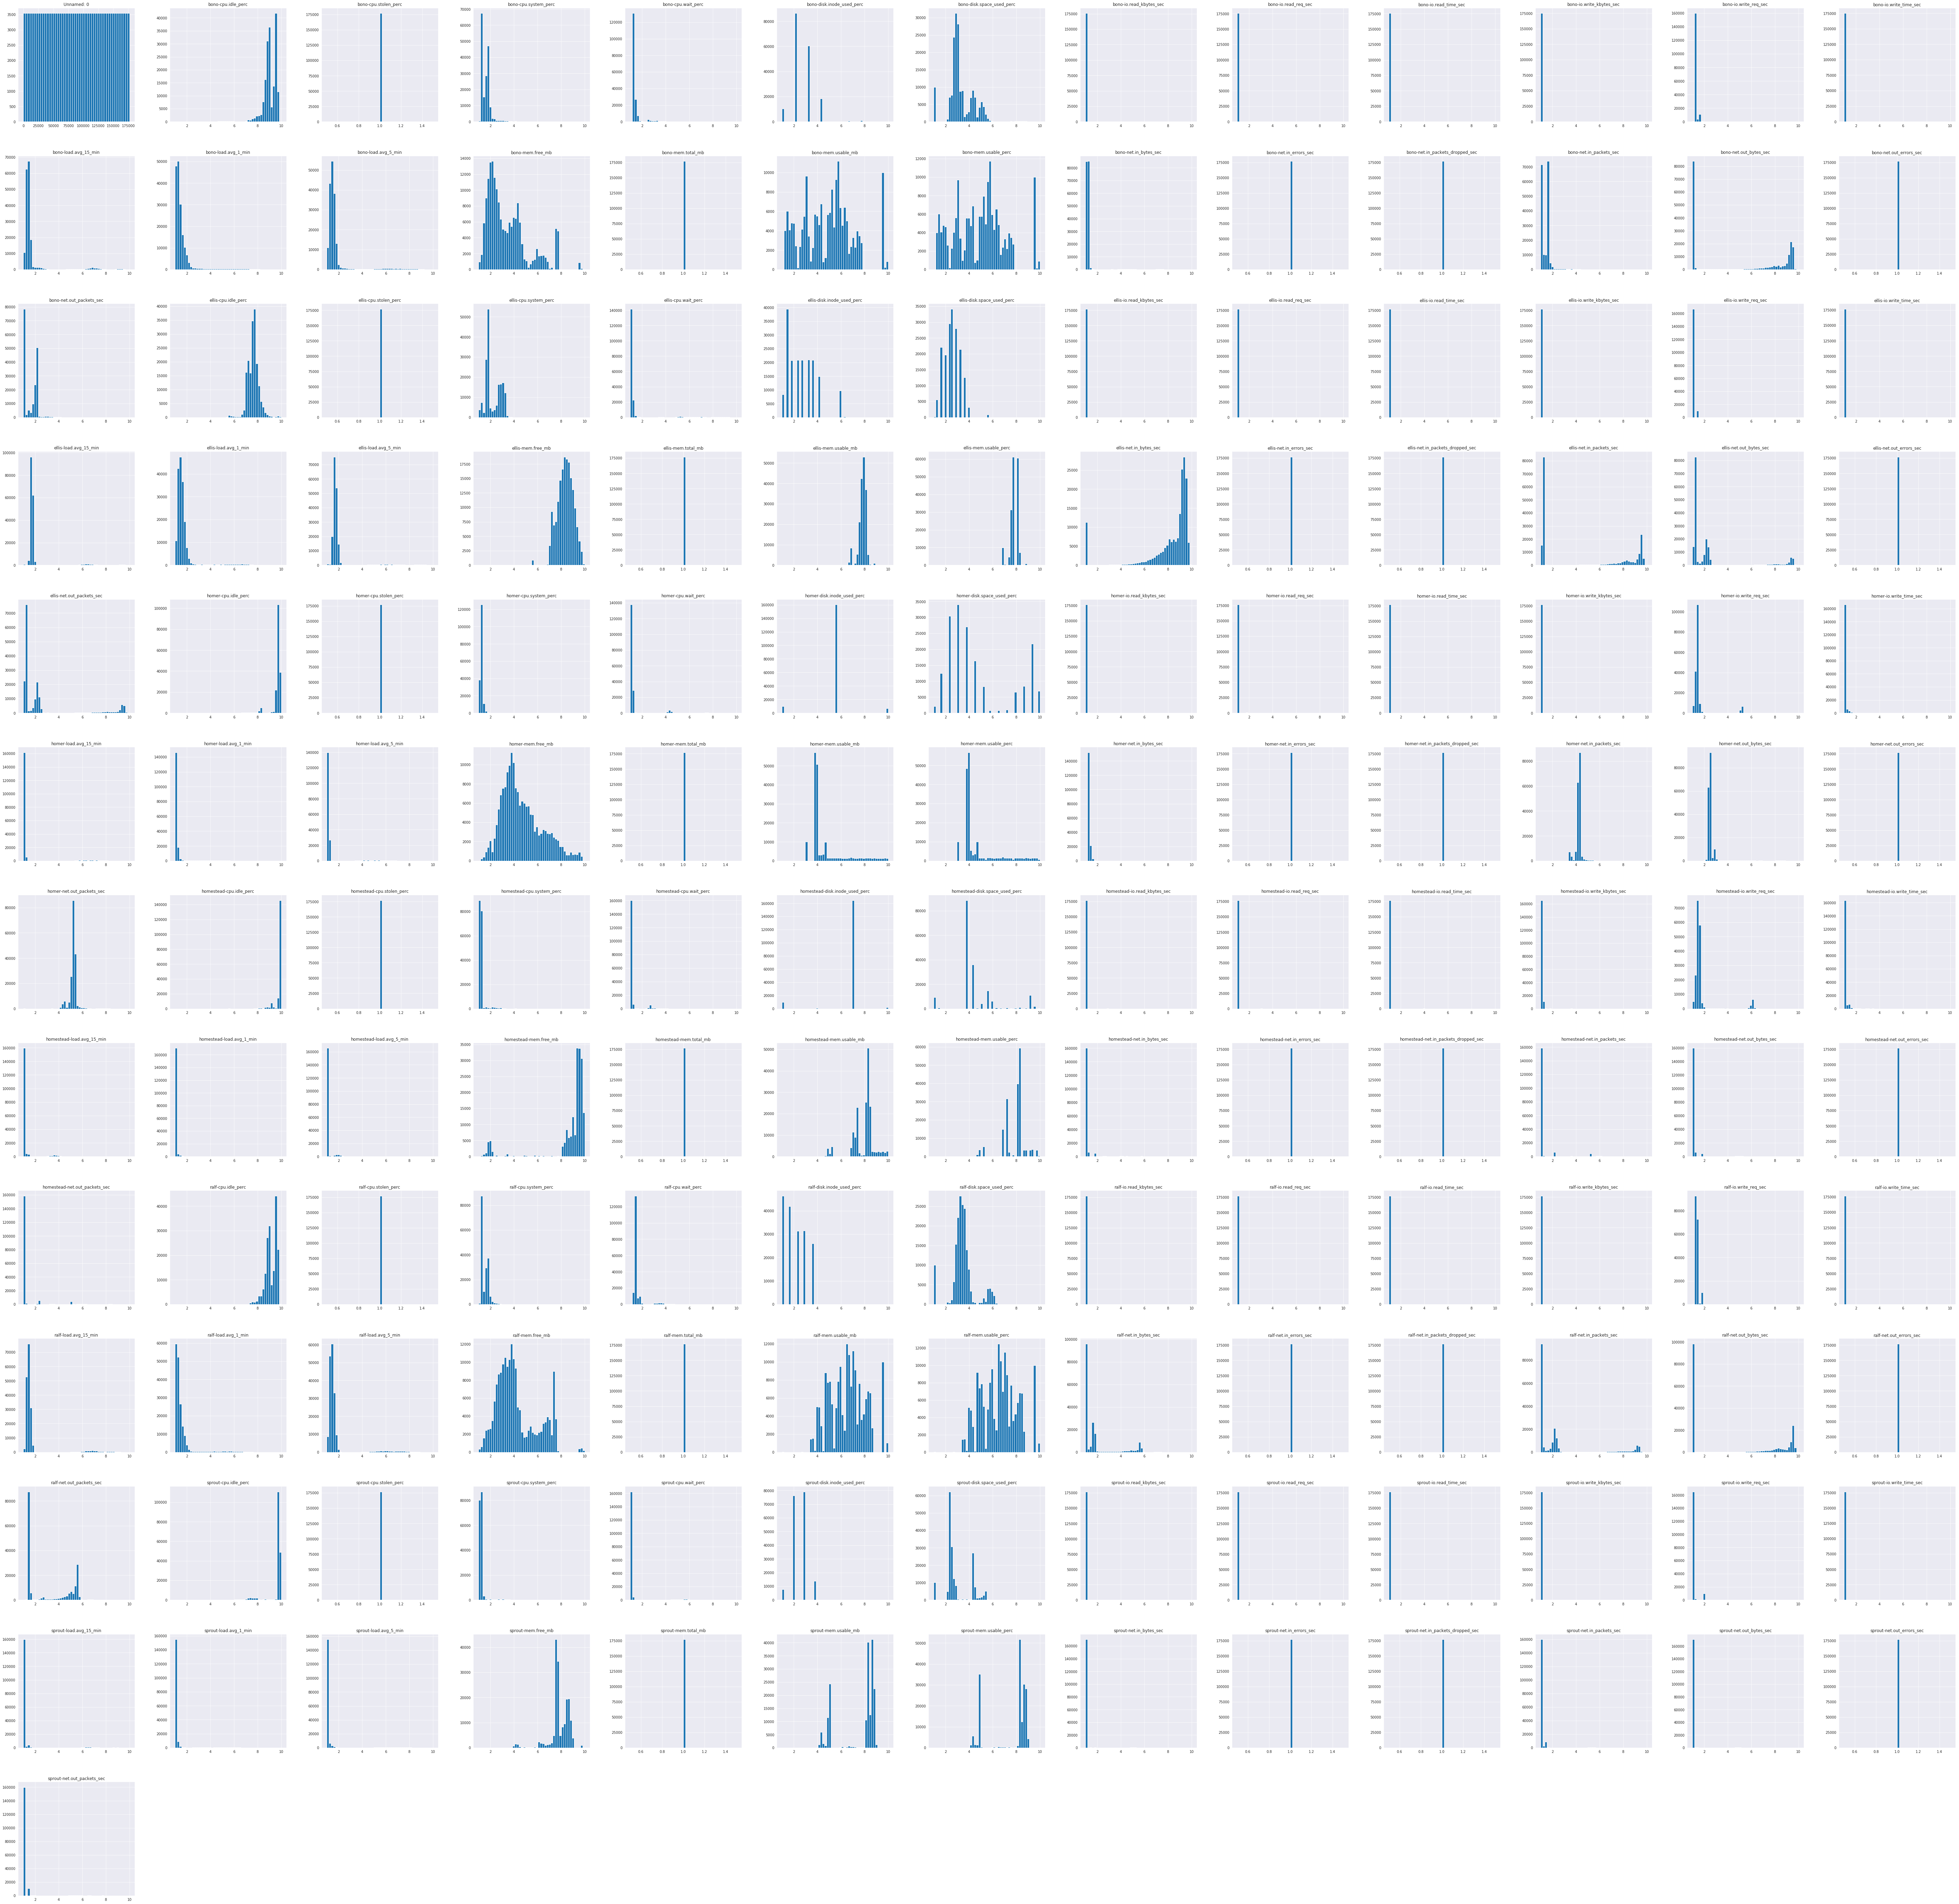

In [0]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
dfvIMS.hist(bins=50, figsize=(100,100))
#save_fig("attribute_histogram_plots")
plt.show()

In [0]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [0]:
# Print out the column names
print('Column names are: ',list(dfvIMS.columns))

Column names are:  ['Unnamed: 0', 'bono-cpu.idle_perc', 'bono-cpu.stolen_perc', 'bono-cpu.system_perc', 'bono-cpu.wait_perc', 'bono-disk.inode_used_perc', 'bono-disk.space_used_perc', 'bono-io.read_kbytes_sec', 'bono-io.read_req_sec', 'bono-io.read_time_sec', 'bono-io.write_kbytes_sec', 'bono-io.write_req_sec', 'bono-io.write_time_sec', 'bono-load.avg_15_min', 'bono-load.avg_1_min', 'bono-load.avg_5_min', 'bono-mem.free_mb', 'bono-mem.total_mb', 'bono-mem.usable_mb', 'bono-mem.usable_perc', 'bono-net.in_bytes_sec', 'bono-net.in_errors_sec', 'bono-net.in_packets_dropped_sec', 'bono-net.in_packets_sec', 'bono-net.out_bytes_sec', 'bono-net.out_errors_sec', 'bono-net.out_packets_sec', 'ellis-cpu.idle_perc', 'ellis-cpu.stolen_perc', 'ellis-cpu.system_perc', 'ellis-cpu.wait_perc', 'ellis-disk.inode_used_perc', 'ellis-disk.space_used_perc', 'ellis-io.read_kbytes_sec', 'ellis-io.read_req_sec', 'ellis-io.read_time_sec', 'ellis-io.write_kbytes_sec', 'ellis-io.write_req_sec', 'ellis-io.write_time

In [0]:
# this function select column from the global df and create a new df with them

def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame

selected_columns = ['bono-cpu.idle_perc', 'bono-cpu.stolen_perc', 'bono-cpu.system_perc', 'bono-cpu.wait_perc', 'bono-disk.inode_used_perc', 'bono-disk.space_used_perc', 'bono-io.read_kbytes_sec', 'bono-io.read_req_sec', 'bono-io.read_time_sec', 'bono-io.write_kbytes_sec', 'bono-io.write_req_sec', 'bono-io.write_time_sec', 'bono-load.avg_15_min', 'bono-load.avg_1_min', 'bono-load.avg_5_min', 'bono-mem.free_mb', 'bono-mem.total_mb', 'bono-mem.usable_mb', 'bono-mem.usable_perc', 'bono-net.in_bytes_sec', 'bono-net.in_errors_sec', 'bono-net.in_packets_dropped_sec', 'bono-net.in_packets_sec', 'bono-net.out_bytes_sec', 'bono-net.out_errors_sec', 'bono-net.out_packets_sec', 'ellis-cpu.idle_perc', 'ellis-cpu.stolen_perc', 'ellis-cpu.system_perc', 'ellis-cpu.wait_perc', 'ellis-disk.inode_used_perc', 'ellis-disk.space_used_perc', 'ellis-io.read_kbytes_sec', 'ellis-io.read_req_sec', 'ellis-io.read_time_sec', 'ellis-io.write_kbytes_sec', 'ellis-io.write_req_sec', 'ellis-io.write_time_sec', 'ellis-load.avg_15_min', 'ellis-load.avg_1_min', 'ellis-load.avg_5_min', 'ellis-mem.free_mb', 'ellis-mem.total_mb', 'ellis-mem.usable_mb', 'ellis-mem.usable_perc', 'ellis-net.in_bytes_sec', 'ellis-net.in_errors_sec', 'ellis-net.in_packets_dropped_sec', 'ellis-net.in_packets_sec', 'ellis-net.out_bytes_sec', 'ellis-net.out_errors_sec', 'ellis-net.out_packets_sec', 'homer-cpu.idle_perc', 'homer-cpu.stolen_perc', 'homer-cpu.system_perc', 'homer-cpu.wait_perc', 'homer-disk.inode_used_perc', 'homer-disk.space_used_perc', 'homer-io.read_kbytes_sec', 'homer-io.read_req_sec', 'homer-io.read_time_sec', 'homer-io.write_kbytes_sec', 'homer-io.write_req_sec', 'homer-io.write_time_sec', 'homer-load.avg_15_min', 'homer-load.avg_1_min', 'homer-load.avg_5_min', 'homer-mem.free_mb', 'homer-mem.total_mb', 'homer-mem.usable_mb', 'homer-mem.usable_perc', 'homer-net.in_bytes_sec', 'homer-net.in_errors_sec', 'homer-net.in_packets_dropped_sec', 'homer-net.in_packets_sec', 'homer-net.out_bytes_sec', 'homer-net.out_errors_sec', 'homer-net.out_packets_sec', 'homestead-cpu.idle_perc', 'homestead-cpu.stolen_perc', 'homestead-cpu.system_perc', 'homestead-cpu.wait_perc', 'homestead-disk.inode_used_perc', 'homestead-disk.space_used_perc', 'homestead-io.read_kbytes_sec', 'homestead-io.read_req_sec', 'homestead-io.read_time_sec', 'homestead-io.write_kbytes_sec', 'homestead-io.write_req_sec', 'homestead-io.write_time_sec', 'homestead-load.avg_15_min', 'homestead-load.avg_1_min', 'homestead-load.avg_5_min', 'homestead-mem.free_mb', 'homestead-mem.total_mb', 'homestead-mem.usable_mb', 'homestead-mem.usable_perc', 'homestead-net.in_bytes_sec', 'homestead-net.in_errors_sec', 'homestead-net.in_packets_dropped_sec', 'homestead-net.in_packets_sec', 'homestead-net.out_bytes_sec', 'homestead-net.out_errors_sec', 'homestead-net.out_packets_sec', 'ralf-cpu.idle_perc', 'ralf-cpu.stolen_perc', 'ralf-cpu.system_perc', 'ralf-cpu.wait_perc', 'ralf-disk.inode_used_perc', 'ralf-disk.space_used_perc', 'ralf-io.read_kbytes_sec', 'ralf-io.read_req_sec', 'ralf-io.read_time_sec', 'ralf-io.write_kbytes_sec', 'ralf-io.write_req_sec', 'ralf-io.write_time_sec', 'ralf-load.avg_15_min', 'ralf-load.avg_1_min', 'ralf-load.avg_5_min', 'ralf-mem.free_mb', 'ralf-mem.total_mb', 'ralf-mem.usable_mb', 'ralf-mem.usable_perc', 'ralf-net.in_bytes_sec', 'ralf-net.in_errors_sec', 'ralf-net.in_packets_dropped_sec', 'ralf-net.in_packets_sec', 'ralf-net.out_bytes_sec', 'ralf-net.out_errors_sec', 'ralf-net.out_packets_sec', 'sprout-cpu.idle_perc', 'sprout-cpu.stolen_perc', 'sprout-cpu.system_perc', 'sprout-cpu.wait_perc', 'sprout-disk.inode_used_perc', 'sprout-disk.space_used_perc', 'sprout-io.read_kbytes_sec', 'sprout-io.read_req_sec', 'sprout-io.read_time_sec', 'sprout-io.write_kbytes_sec', 'sprout-io.write_req_sec', 'sprout-io.write_time_sec', 'sprout-load.avg_15_min', 'sprout-load.avg_1_min', 'sprout-load.avg_5_min', 'sprout-mem.free_mb', 'sprout-mem.total_mb', 'sprout-mem.usable_mb', 'sprout-mem.usable_perc', 'sprout-net.in_bytes_sec', 'sprout-net.in_errors_sec', 'sprout-net.in_packets_dropped_sec', 'sprout-net.in_packets_sec', 'sprout-net.out_bytes_sec', 'sprout-net.out_errors_sec', 'sprout-net.out_packets_sec']

dfvIMS2 = select_columns(dfvIMS, selected_columns)

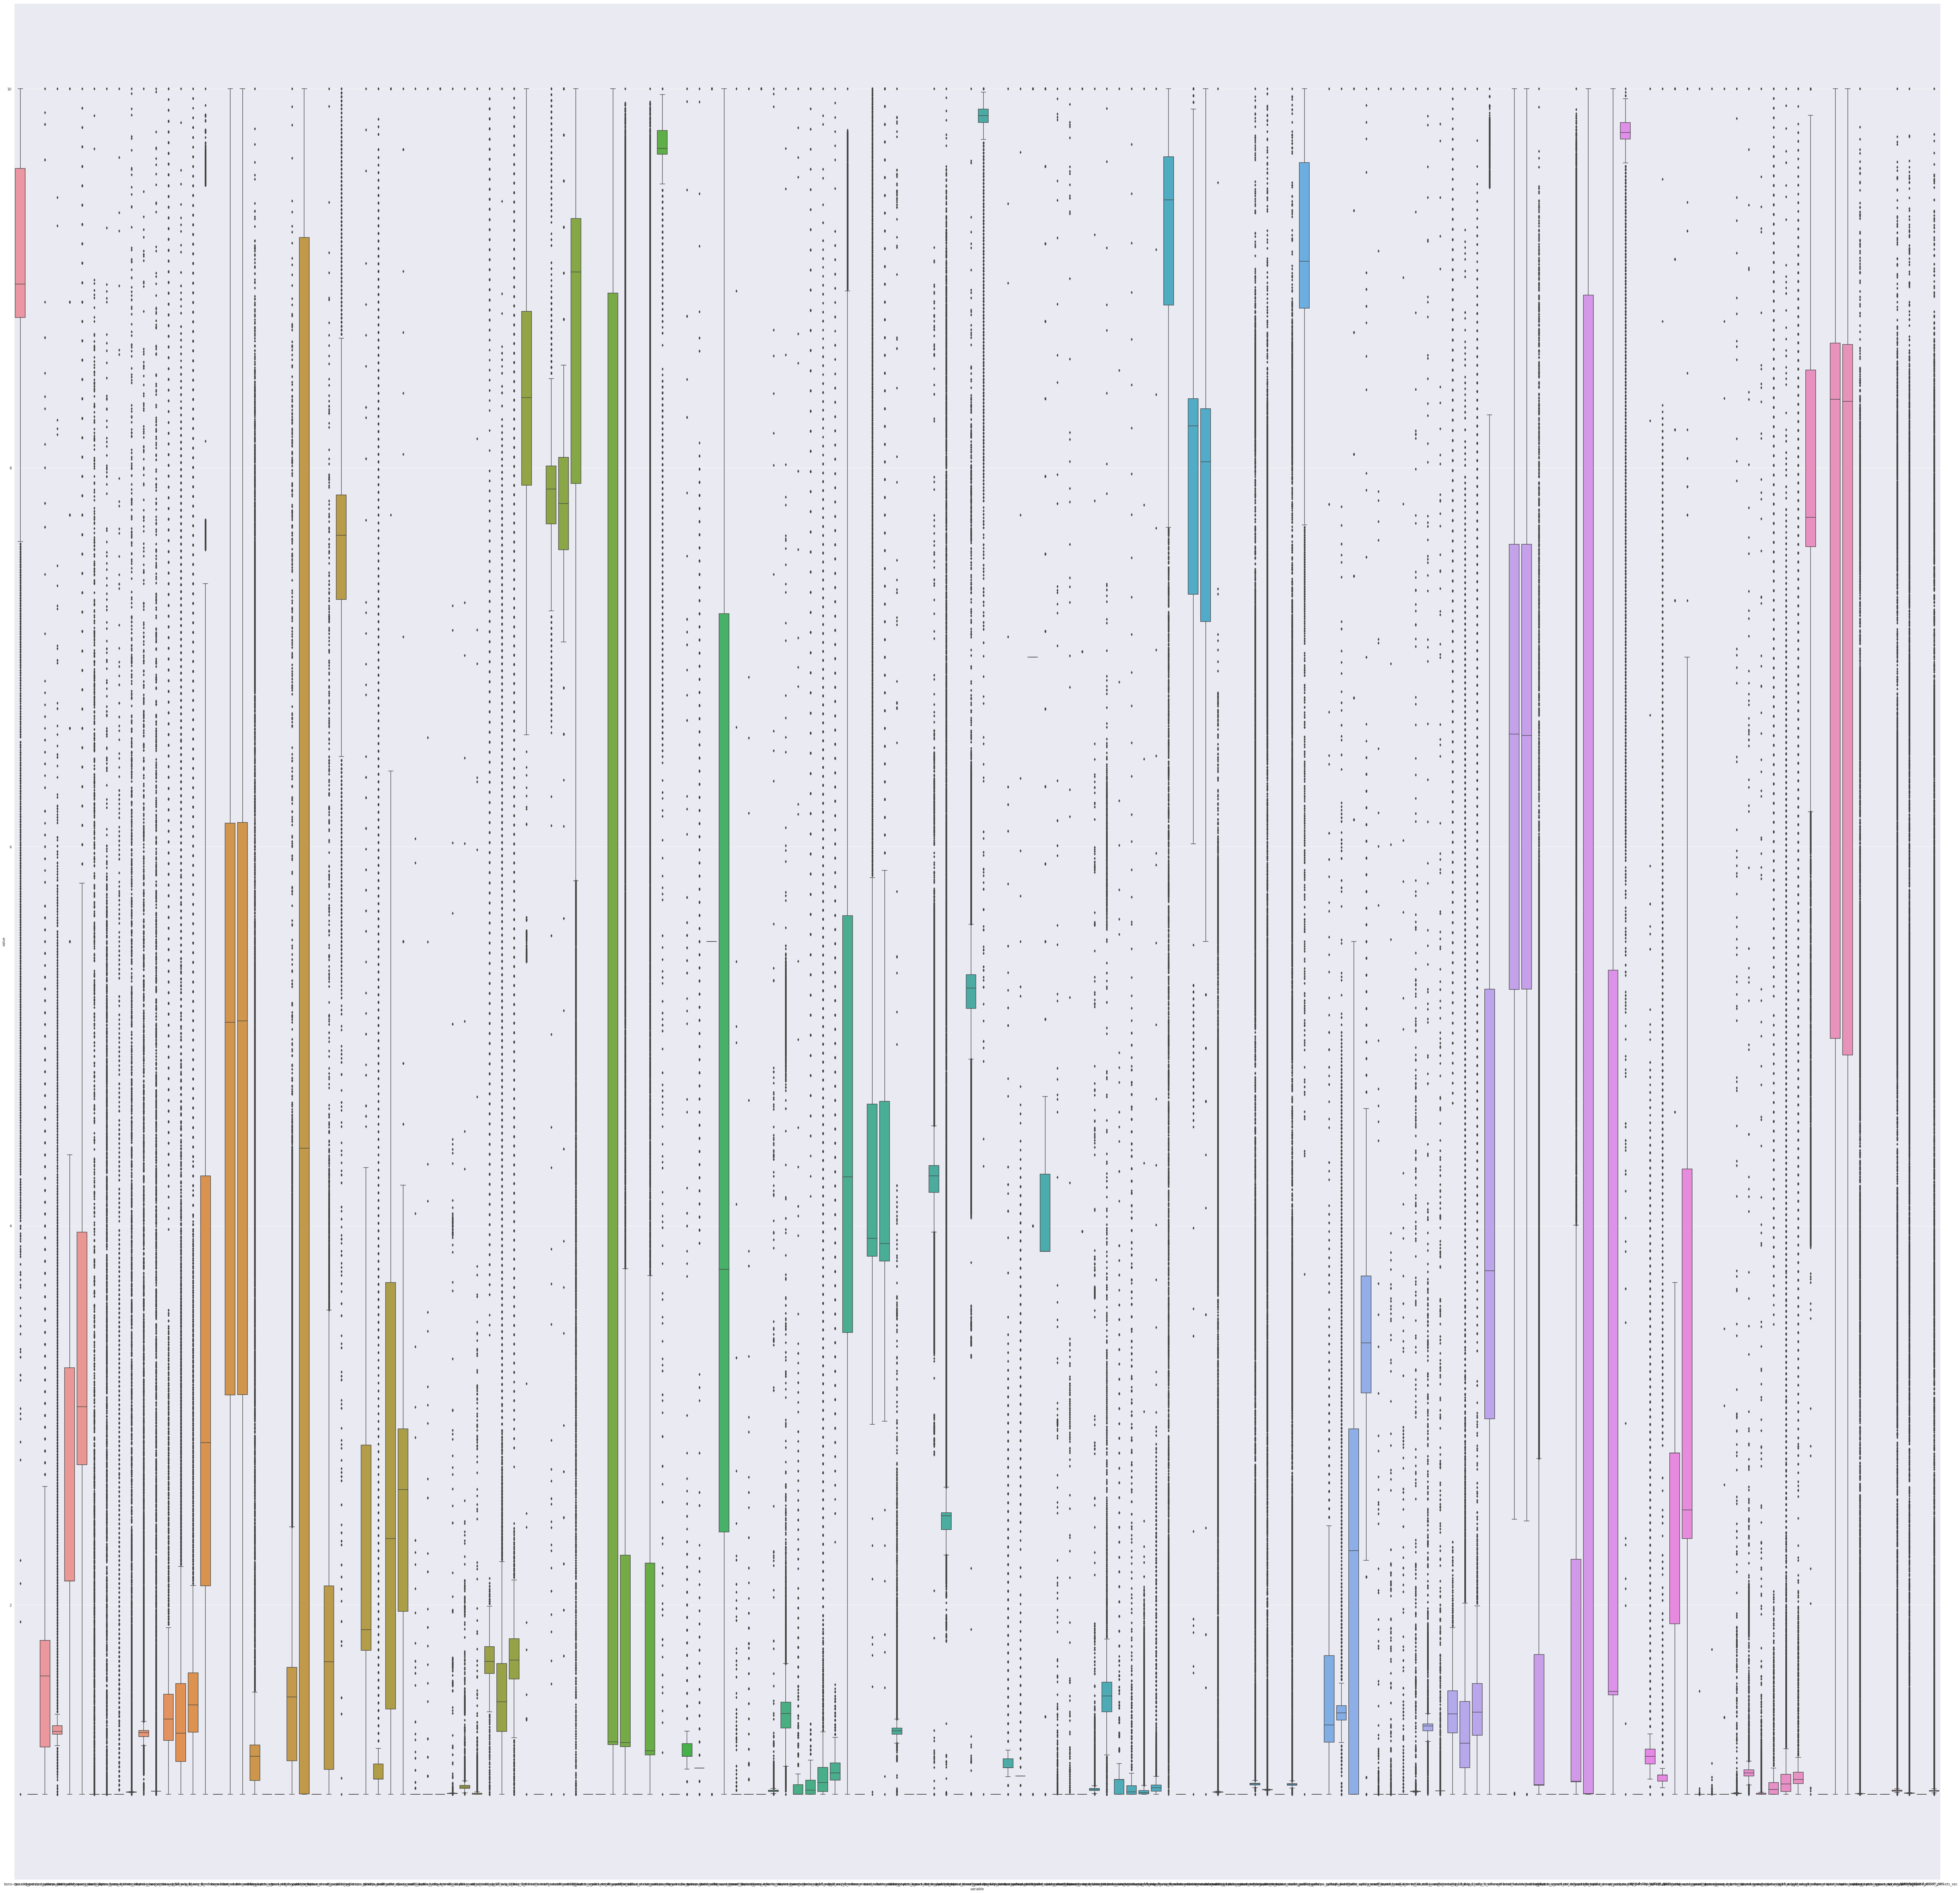

In [0]:
# we show here the boxplot
plt.figure(figsize=(100,100))
#df_Ellis_7.boxplot(figsize=(20,20))
ax = sns.boxplot(x="variable", y="value", data=pd.melt(dfvIMS2))

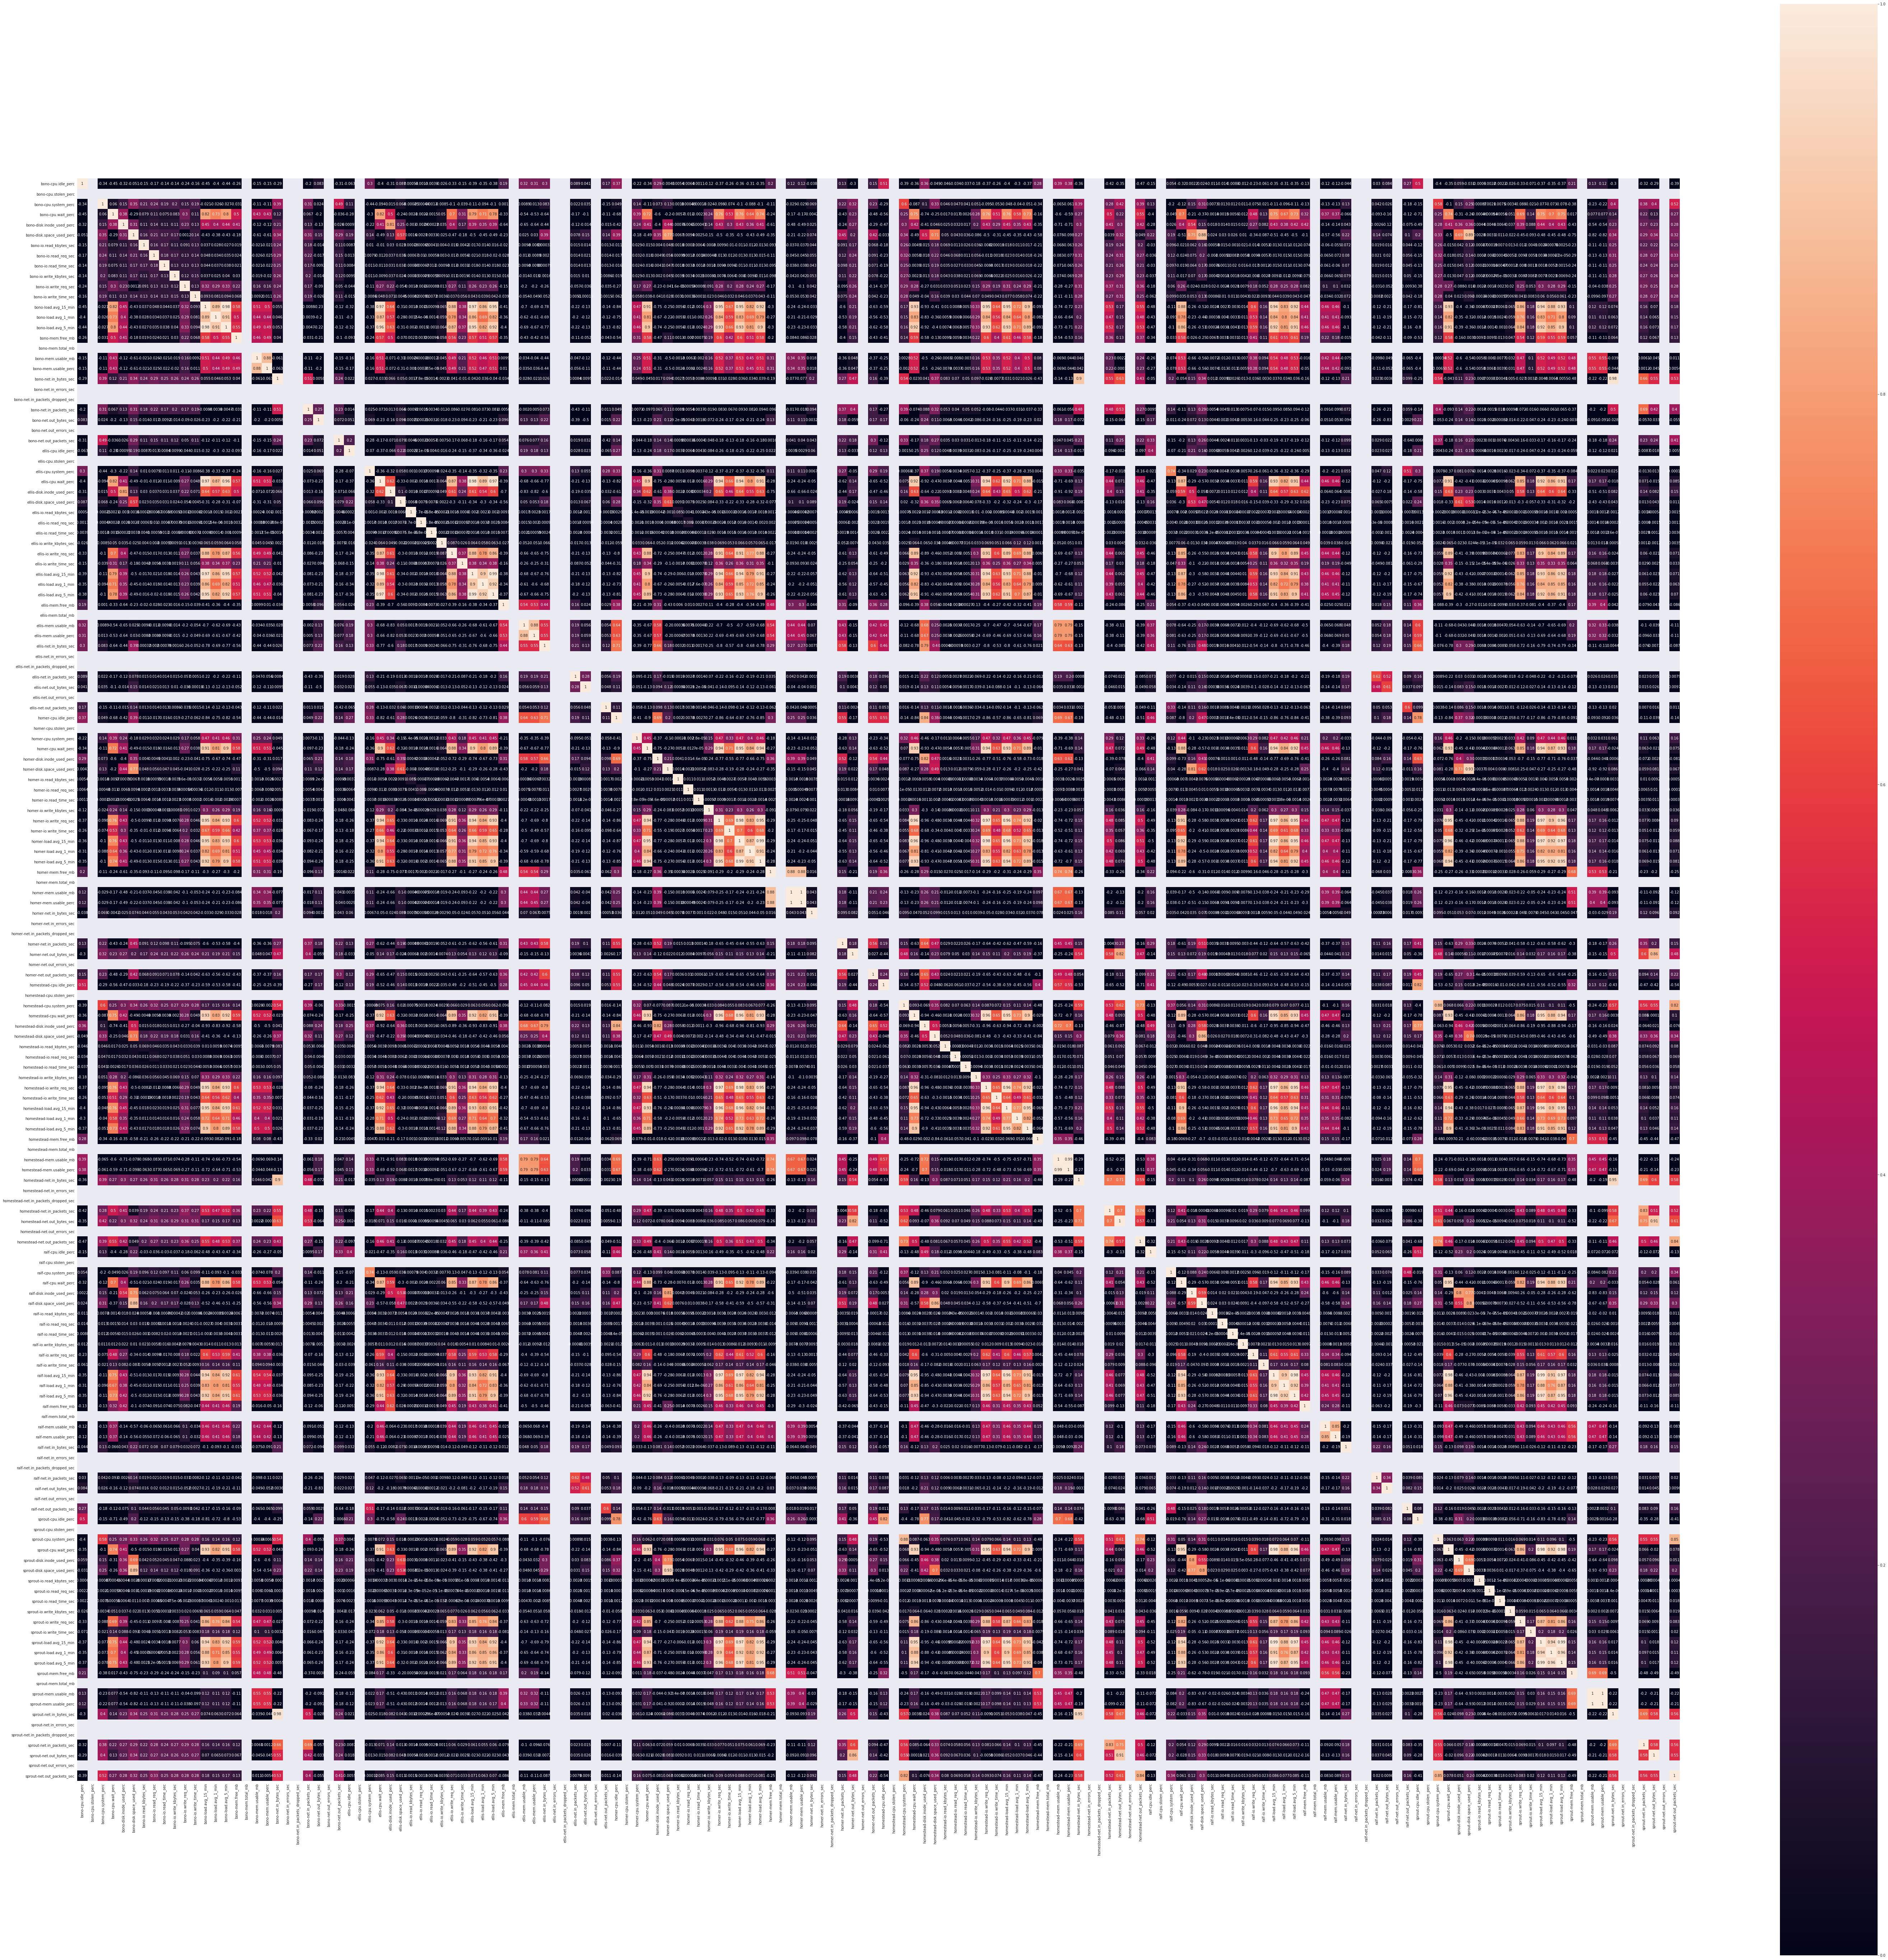

In [0]:
# we establish the corrmartrice
correaltionMatrice = dfvIMS2.corr()
f, ax = plt.subplots(figsize=(100, 100))
sns.heatmap(correaltionMatrice, cbar=True, vmin=0, vmax=1, square=True, annot=True);
plt.show()

In [0]:
dfvIMS2.shape

(177000, 156)

In [0]:
#scatterplot pairplot of all variables

import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(dfvIMS2)

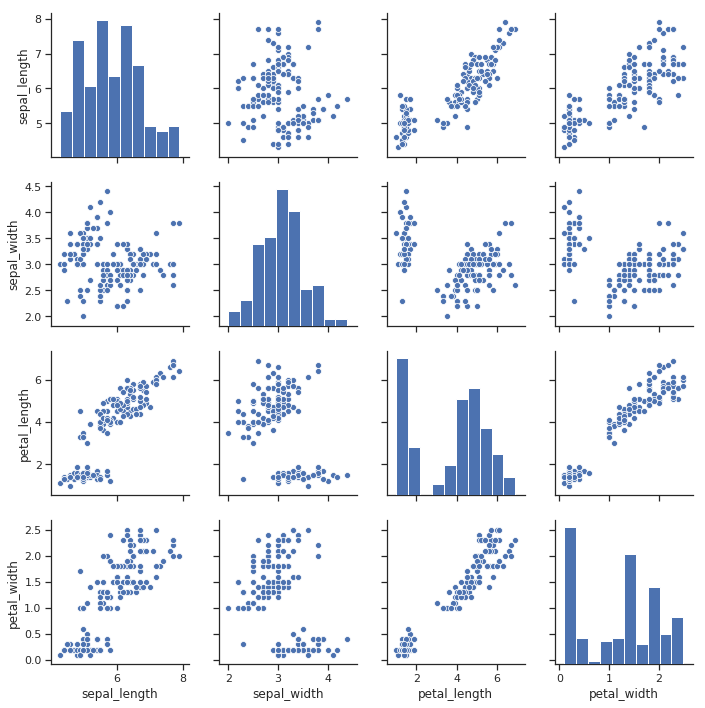

In [0]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris)

In [0]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
#iris = sns.load_dataset("iris")
g = sns.pairplot(dfvIMS2)